In [3]:
import contextily
import meteostat
import shapely
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import colormaps
import matplotlib.lines as mlines
from datetime import datetime

from utils.data_download import try_download_visual_crossing_data_and_save_to_csv
from utils.data_transformation import tabularise_data_by_season_and_area


def to_meteostat_point(point: shapely.Point, alt: int = None) -> meteostat.Point:
    return meteostat.Point(point.y, point.x, alt)

In [2]:
polygons_path = "../data/aux/SAIS_areaPolygons.geojson"

gdf_areas = gpd.read_file(polygons_path)

# gdf.to_crs(epsg=27700, inplace=True)
# gdf["area (km^2)"] = gdf.area / 1000000
gdf_areas["centroid"] = gdf_areas.centroid

gdf_dict = gdf_areas.set_index("name").to_dict("index")

In [3]:
stations_visualcrossing = pd.read_csv(
    "../data/aux/stations_VisualCrossing_Scotland_subset.csv"
)
stations_visualcrossing = gpd.GeoDataFrame(
    stations_visualcrossing,
    geometry=gpd.points_from_xy(
        stations_visualcrossing.longitude, stations_visualcrossing.latitude
    ),
)


centroid_creag_meagaidh = gdf_dict["Creag Meagaidh"]["centroid"]

retriever_meteostat = meteostat.Stations().nearby(
    centroid_creag_meagaidh.y, centroid_creag_meagaidh.x
)
stations_meteostat = retriever_meteostat.fetch(len(stations_visualcrossing))
stations_meteostat = gpd.GeoDataFrame(
    stations_meteostat,
    geometry=gpd.points_from_xy(
        stations_meteostat.longitude, stations_meteostat.latitude
    ),
)

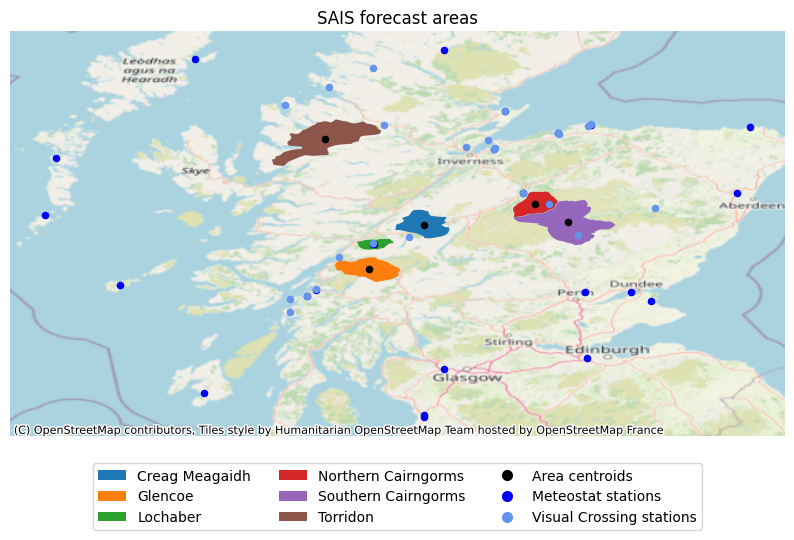

In [4]:
cmap = colormaps["tab10"]

fig, ax = plt.subplots(figsize=(10, 10))
pmarks = []
i = 0
for label, data in gdf_areas.groupby("name"):
    color = cmap(i)
    data.plot(ax=ax, color=color)
    pmarks.append(Patch(facecolor=color, label=label))
    i += 1

c_centroid = "black"
c_meteostat = "blue"
c_visualcrossing = "cornflowerblue"
dot_size = 20
gdf_areas.geometry.centroid.plot(ax=ax, color=c_centroid, markersize=dot_size)
stations_meteostat.geometry.plot(ax=ax, color=c_meteostat, markersize=dot_size)
stations_visualcrossing.geometry.plot(
    ax=ax, color=c_visualcrossing, markersize=dot_size
)

handles, _ = ax.get_legend_handles_labels()
pmarks.append(
    mlines.Line2D(
        [],
        [],
        color=c_centroid,
        marker="o",
        linestyle="None",
        markersize=7,
        label="Area centroids",
    )
)
pmarks.append(
    mlines.Line2D(
        [],
        [],
        color=c_meteostat,
        marker="o",
        linestyle="None",
        markersize=7,
        label="Meteostat stations",
    )
)
pmarks.append(
    mlines.Line2D(
        [],
        [],
        color=c_visualcrossing,
        marker="o",
        linestyle="None",
        markersize=7,
        label="Visual Crossing stations",
    )
)

ax.legend(
    handles=[*handles, *pmarks], loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3
)

contextily.add_basemap(ax, crs=gdf_areas.crs.to_string())
plt.title("SAIS forecast areas")
plt.axis("off")
plt.show()

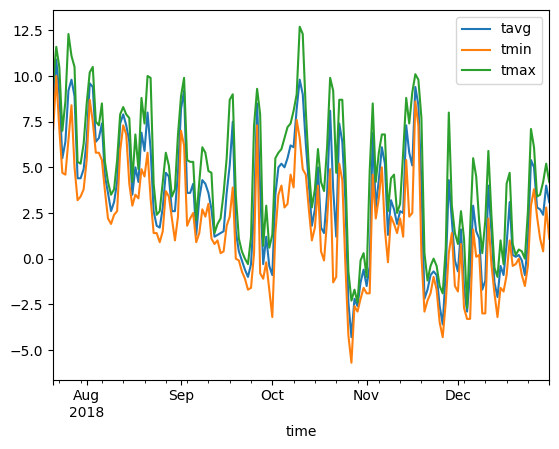

24

In [5]:
# Import Meteostat library and dependencies

import matplotlib.pyplot as plt
from meteostat import Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
region = to_meteostat_point(gdf_dict["Creag Meagaidh"]["centroid"])

# Get daily data for 2018
data = Daily(region, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=["tavg", "tmin", "tmax"])
plt.show()
len(stations_meteostat)

## Visual Crossing data download

In [4]:
gdf_summits = gpd.read_file("../data/aux/SAIS_summits.geojson")
df_seasons = pd.read_csv("../data/aux/SAIS_seasons.csv")
df_seasons["season_start"] = pd.to_datetime(df_seasons["season_start"])
df_seasons["season_end"] = pd.to_datetime(df_seasons["season_end"])

forecast = False
hourly = False

# long-running, API limits
rerun = False

if rerun:
    for hourly in [False, True]:
        for _, season in df_seasons.iterrows():
            start = season["season_start"]
            end = season["season_end"]
            for _, area in gdf_summits.iterrows():
                try_download_visual_crossing_data_and_save_to_csv(
                    area_name=area["name"],
                    latitute=area.geometry.y,
                    longitude=area.geometry.x,
                    start=start,
                    end=end,
                    forecast=False,
                    hourly=hourly,
                )

In [ ]:
import glob

for name in gdf_summits["name"].unique():
    print(name.lower().replace(" ", "_"))
    files = glob.glob(f"../data/proprietary/weather/visual_crossing/{name.lower().replace(' ', '_')}*observed**days*")
    for file in files:
        start, end = file[file.find("observed_") + len("observed_"):file.find("_days")].split("_")
        df_seasons = pd.DataFrame({'season_start': [start], 'season_end': [end]})
        print(df_season_range)

creag_meagaidh
  season_start  season_end
0   2011-12-08  2012-05-19
  season_start  season_end
0   2010-11-19  2011-04-09
  season_start  season_end
0   2014-12-11  2015-05-03
  season_start  season_end
0   2009-12-17  2010-04-10
  season_start  season_end
0   2018-12-14  2019-04-13
  season_start  season_end
0   2007-12-14  2008-04-13
  season_start  season_end
0   2022-12-08  2023-04-15
  season_start  season_end
0   2012-12-07  2013-05-11
  season_start  season_end
0   2016-12-20  2017-04-02
  season_start  season_end
0   2017-12-15  2018-04-14
  season_start  season_end
0   2019-12-13  2020-03-23
  season_start  season_end
0   2015-12-17  2016-05-07
  season_start  season_end
0   2021-11-25  2022-04-17
  season_start  season_end
0   2020-12-02  2021-05-08
  season_start  season_end
0   2013-12-12  2014-07-18
  season_start  season_end
0   2023-11-13  2024-04-13
  season_start  season_end
0   2008-12-16  2009-04-17
glencoe
  season_start  season_end
0   2008-12-16  2009-04-17
  sea

In [ ]:
max_lookback = round(df_seasons["day_diff"].mean())



df_weather_tab = tabularise_data_by_season_and_area(
    seasons=df_seasons,
    data=df_sais,
    dependent_variables=dependent_variables,
    season_max_lookback=max_lookback,
    include_seasons_day=True,
    skip_missing_days=True,
)